In [2]:
from google.colab import files
uploaded = files.upload()

Saving cyberfeddefender_dataset.csv to cyberfeddefender_dataset.csv


In [3]:
# Install data manipulation and visualization libraries
!pip install pandas matplotlib seaborn

# Install machine learning models and tools
!pip install scikit-learn

# Install SHAP for explainability
!pip install shap

# Install LIME for local explainability
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f777510dc0938d17151daa5c6ee1c8d45e9a7444506b2a20b857171d353956af
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   object 
 1   Source_IP           1430 non-null   object 
 2   Destination_IP      1430 non-null   object 
 3   Protocol            1430 non-null   object 
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   object 
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_He

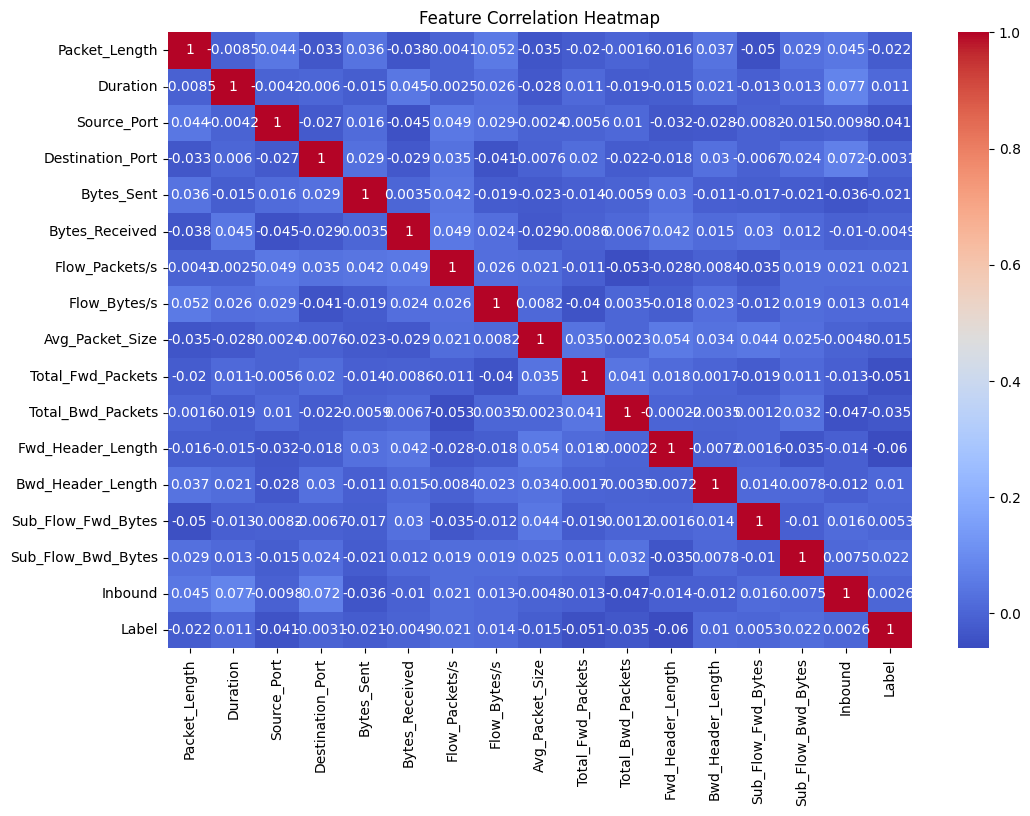

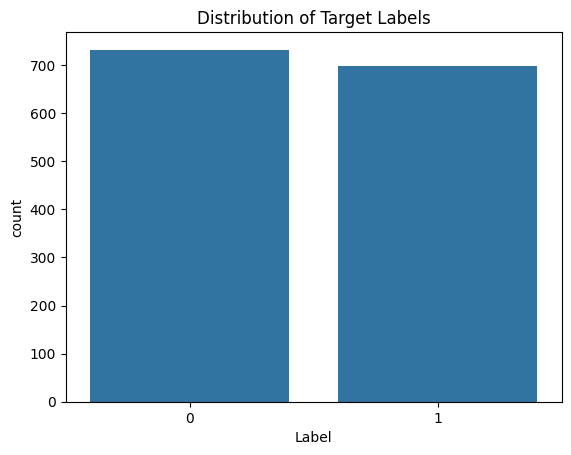

In [7]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'cyberfeddefender_dataset.csv'  # Update with your dataset path if different
dataset = pd.read_csv(file_path)

# Display basic info and check for null values
print(dataset.info())
print("\nMissing Values:\n", dataset.isnull().sum())

# Show a preview of the dataset
print("\nDataset Preview:\n", dataset.head())

# Ensure only numerical columns are used for correlation
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])

# Plot correlations between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of target labels (assuming the column name is 'Label')
if 'Label' in dataset.columns:
    sns.countplot(data=dataset, x='Label')
    plt.title('Distribution of Target Labels')
    plt.show()
else:
    print("Column 'Label' not found in the dataset.")


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop irrelevant columns
irrelevant_columns = ['Timestamp', 'Source_IP', 'Destination_IP']
dataset = dataset.drop(columns=irrelevant_columns)

# Encode categorical features
categorical_columns = ['Protocol', 'Flags', 'Attack_Type']
encoder = LabelEncoder()
for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

# Separate features and target
X = dataset.drop(columns=['Label'])
y = dataset['Label']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.55      0.51       146
           1       0.45      0.38      0.41       140

    accuracy                           0.47       286
   macro avg       0.46      0.46      0.46       286
weighted avg       0.46      0.47      0.46       286



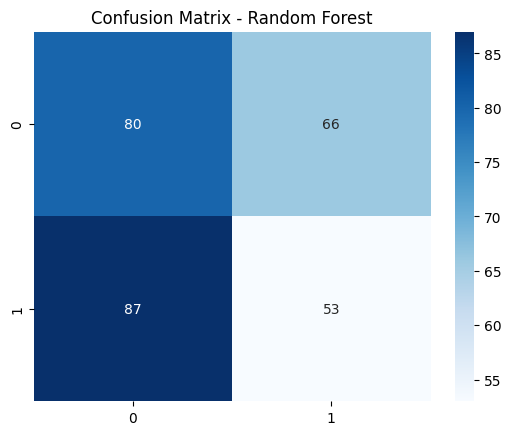

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.49       146
           1       0.46      0.45      0.45       140

    accuracy                           0.47       286
   macro avg       0.47      0.47      0.47       286
weighted avg       0.47      0.47      0.47       286



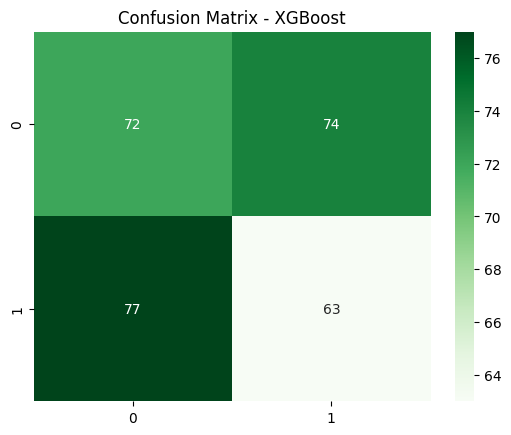

In [10]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.show()


Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.66      0.55       146
           1       0.42      0.26      0.32       140

    accuracy                           0.46       286
   macro avg       0.45      0.46      0.44       286
weighted avg       0.45      0.46      0.44       286



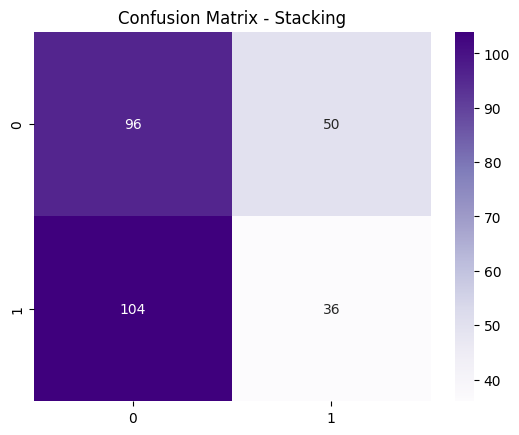

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base models and meta-model
base_models = [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
               ('xgb', XGBClassifier(random_state=42))]
meta_model = LogisticRegression()

# Initialize and train Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Evaluate
y_pred_stack = stacking_model.predict(X_test)
print('Stacking Classification Report:\n', classification_report(y_test, y_pred_stack))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Stacking')
plt.show()


Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52       146
           1       0.48      0.44      0.46       140

    accuracy                           0.49       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.49      0.49      0.49       286



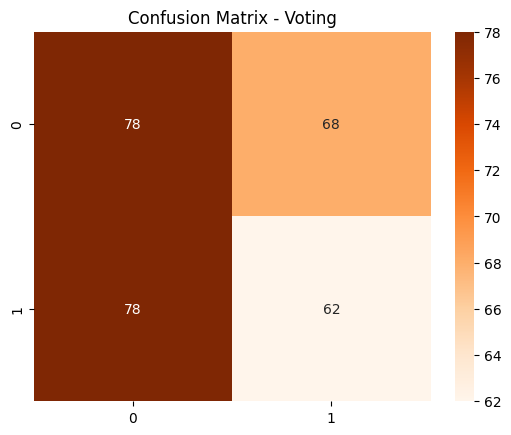

In [12]:
from sklearn.ensemble import VotingClassifier

# Define classifiers
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], voting='soft')  # Change to 'hard' for hard voting

# Train and evaluate
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print('Voting Classifier Classification Report:\n', classification_report(y_test, y_pred_voting))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Voting')
plt.show()


Random Forest Cross-Validation Scores: [0.47552448 0.55244755 0.5034965  0.51048951 0.51398601]
Random Forest Mean CV Score: 0.5112
XGBoost Cross-Validation Scores: [0.51748252 0.52097902 0.54895105 0.48951049 0.48601399]
XGBoost Mean CV Score: 0.5126
Stacking Cross-Validation Scores: [0.4965035  0.51398601 0.54895105 0.48251748 0.47552448]
Stacking Mean CV Score: 0.5035
Voting Cross-Validation Scores: [0.50699301 0.53496503 0.53146853 0.5034965  0.47552448]
Voting Mean CV Score: 0.5105


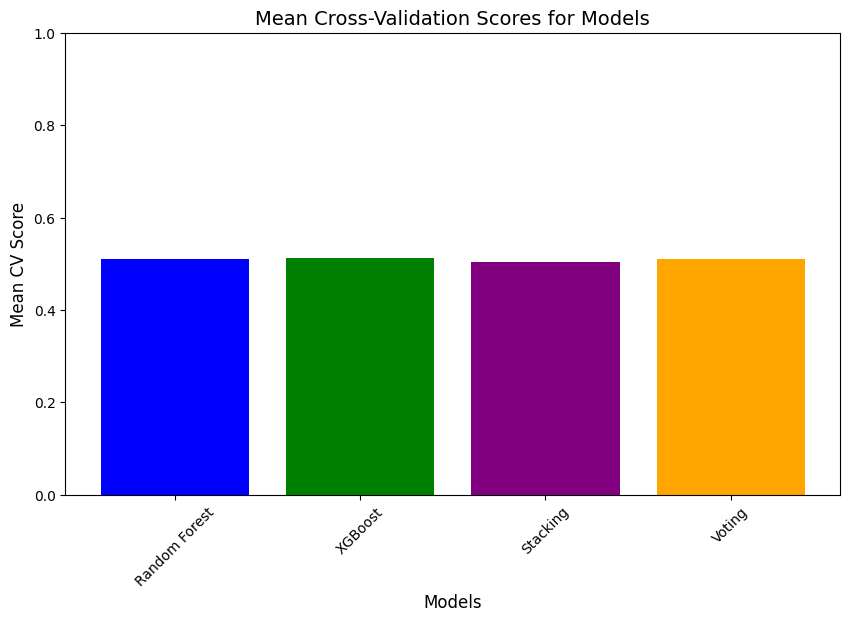

In [14]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Cross-validate each model and store results
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'Stacking': stacking_model, 'Voting': voting_model}

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_results[name] = cv_scores.mean()
    print(f'{name} Cross-Validation Scores: {cv_scores}')
    print(f'{name} Mean CV Score: {cv_scores.mean():.4f}')

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values(), color=['blue', 'green', 'purple', 'orange'])
plt.title('Mean Cross-Validation Scores for Models', fontsize=14)
plt.ylabel('Mean CV Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)  # Assuming the scores are between 0 and 1
plt.xticks(rotation=45)
plt.show()



Training XGBoost Model for SHAP and LIME

Explainable AI with SHAP
SHAP Summary Plot:


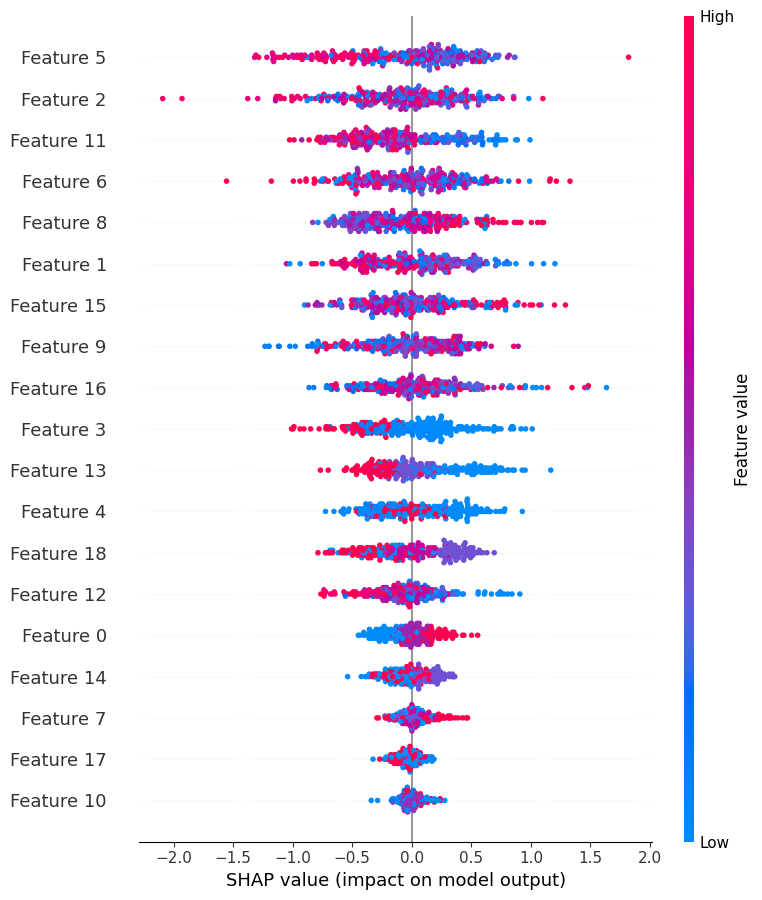

SHAP Feature Importance Plot:


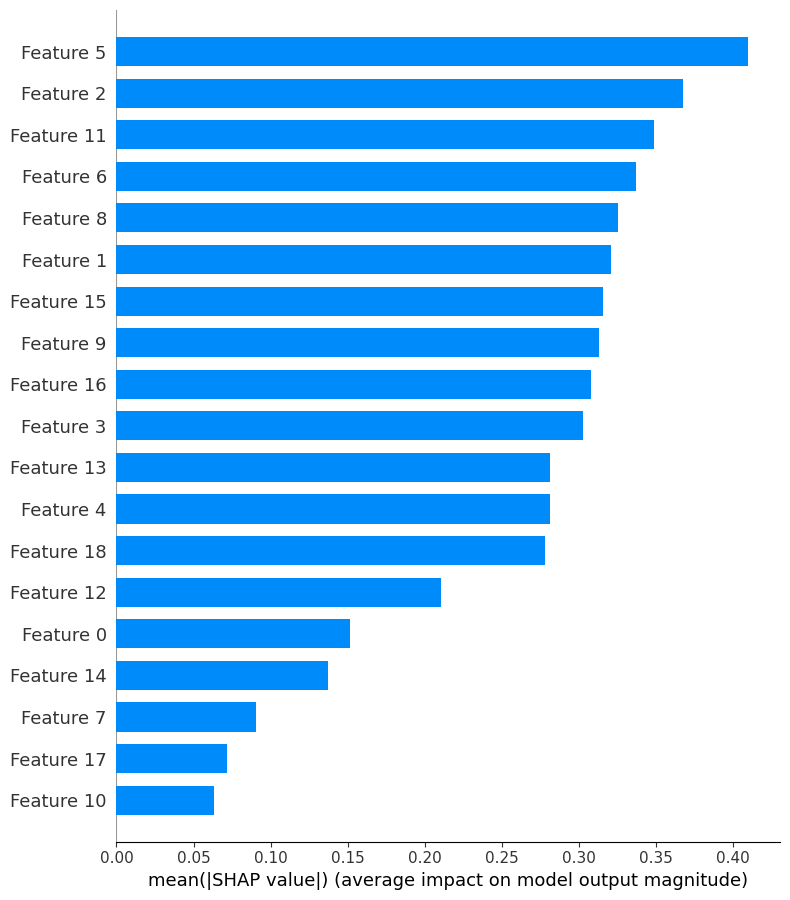


Explainable AI with LIME
LIME Explanation for a Single Instance:


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [23]:
from xgboost import XGBClassifier
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Ensure the dataset is prepared
# X_train, X_test, y_train, y_test should already be defined.

# Convert X_train to DataFrame if it's not already a DataFrame
X_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])

# Step 1: Train the XGBoost model
print("\nTraining XGBoost Model for SHAP and LIME")
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_df, y_train)

# Step 2: SHAP Explanation
print("\nExplainable AI with SHAP")
best_model = xgb  # Set the best-performing model
explainer = shap.Explainer(best_model, X_train_df)
shap_values = explainer(X_test)

# SHAP Summary Plot
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X_test)

# SHAP Feature Importance Plot
print("SHAP Feature Importance Plot:")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Step 3: LIME Explanation
print("\nExplainable AI with LIME")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Train data as numpy array
    #feature_names=X_train.columns,  # Ensure X_train is a DataFrame for column names
    class_names=['Not Threat', 'Threat'],  # Replace with your class labels
    mode='classification'
)

# Convert X_test to DataFrame if it's not already a DataFrame
X_test_df = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])

# Explain a single prediction (instance_idx can be changed)
instance_idx = 0  # Change this index to explain a different instance
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_df.iloc[instance_idx],  # Use iloc to pass the test instance
    predict_fn=best_model.predict_proba
)

# Visualize the LIME explanation
print("LIME Explanation for a Single Instance:")
lime_exp.show_in_notebook(show_table=True)

# Save the LIME explanation as an HTML file
lime_exp.save_to_file('lime_explanation.html')

